<a href="https://colab.research.google.com/github/Sanjeevnara/Deep-Learning/blob/master/Deep_learning_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN
## This tutorial is for hands on with CNN and Cifar data
Lets first load the Cifar 10 datasets 

In [1]:
# Import tensorflow and matplotlib

import tensorflow as tf 
import matplotlib.pyplot as plt


In [2]:
# Now we load the data and import layers , model and data 

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print('Train data is ' , train_images.shape , '& test data is ', test_images.shape)

print('Type of train_images variable is ', type(train_images))

# we also have to normalise the data 

train_images, test_images = train_images / 255.0, test_images / 255.0






170500096/170498071 [==============================] - 6s 0us/step
Train data is  (50000, 32, 32, 3) & test data is  (10000, 32, 32, 3)
Type of train_images variable is  <class 'numpy.ndarray'>


In [5]:
# Lets create a simple CNN model with 2 layers 
from tensorflow.keras import models , layers

model_cnn = models.Sequential() # Load sequential model 

model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # add a layer to CNN, with 2D conv layer of 32 filters
# of size 3 * 3 ;


model_cnn.add(layers.MaxPooling2D((2, 2))) # Add a pooling layer 


model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # add second layer to CNN 
model_cnn.add(layers.MaxPooling2D((2, 2))) # add max pooling to second layer 

model_cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # add second layer to CNN 
model_cnn.add(layers.MaxPooling2D((2, 2))) # add max pooling to second layer 







In [6]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
____________________________________________________

In [7]:
# Now we add the flatten layer and output layer 
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dense(10))

In [8]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [9]:
# Lets compile the model now 
model_cnn.compile(optimizer= 'adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

history = model_cnn.fit(train_images, train_labels, epochs=50,
                        validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5013 - accuracy: 0.4511 - val_loss: 1.2230 - val_accuracy: 0.5619
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1255 - accuracy: 0.6025 - val_loss: 1.1234 - val_accuracy: 0.6092
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9594 - accuracy: 0.6636 - val_loss: 0.9775 - val_accuracy: 0.6567
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8596 - accuracy: 0.6984 - val_loss: 0.9091 - val_accuracy: 0.6873
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7724 - accuracy: 0.7320 - val_loss: 0.8638 - val_accuracy: 0.7082
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7050 - accuracy: 0.7537 - val_loss: 0.8796 - val_accuracy: 0.7022
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6451 - accuracy: 0.7751 - val_loss: 0.8407 - val_ac

313/313 - 1s - loss: 2.7696 - accuracy: 0.6901


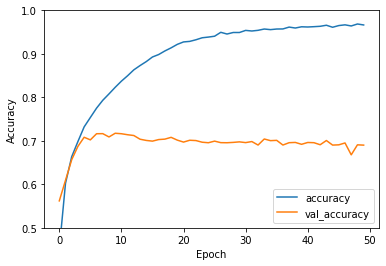

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn.evaluate(test_images,  test_labels, verbose=2)

I have played with layers: 

First i start with 2 layers, in that case the training accuracy was around 90 % but the test was around 65 %
When i add a new convolution layer, the training accuracy reached to 96 % but the testing accuracy was saturated to 69 % in first 10 epochs. I am pretty sure this is case of overfitting. 
